In [68]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [69]:
data = np.array([
    [1, 5],
    [2, 7],
    [3, 4],
    [4, 12],
    [5, 13],
    [6, 15],
    [7, 16],
    [8, 20],
    [9, 21],
    [10, 25]
])
x = data[:,0]
y = data[:,1]
n = len(x)

## Стохастический градиентный спуск

- На кажжой итерации обучаемся только по части выборки
- Сокращение числа вычислений
- Вносим смещение - боремся с переобучением

In [70]:
#Обучаемся на одной выборке из данных
iter = 100000
w1, w0 = 0, 0
L=0.001

sample_size = 3
#for i in range(iter):
    #idx = np.random.choice(n, sample_size, replace=False)

    #D_w0 = 2*sum(-y[idx] + w0 + w1*x[idx])
    #D_w1 = 2*sum((x[idx]*(-y[idx] + w0 + w1*x[idx])))
    #w1 -=L*D_w1
    #w0 -=L*D_w0
print(w1)
print(w0)

0
0


In [71]:
#Как оценить насколько сильно промахиваются прогнозы при линейной регрессии
#Используем коэффициент кореляции

data_df = pd.DataFrame(data)
print(data_df[1].values[::-1])
print(data_df.corr(method='pearson'))

[25 21 20 16 15 13 12  4  7  5]
          0         1
0  1.000000  0.970093
1  0.970093  1.000000


## Обучающие и тестовые выборки

In [72]:
#Делим выборку на две: Обучение и тест 2/3, 4/5, 9/10

In [76]:
X = data_df.values[:, :-1]
Y = data_df.values[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

model = LinearRegression()
#model.fit(X_train, Y_train)

#r = model.score(X_test, Y_test)
#print(r)

kfold = KFold(n_splits=5, random_state=1, shuffle=True)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean(), results.std())

#Метрики показывают насколько единообразно ведет себя модель

#Возможно использование поэлементой перекрестной валидации

#Валидационная выборка для сравнения различных моделей

data_df = pd.read_csv('data/multiple_independent_variable_linear.csv')

X = data_df.values[:,:-1]
Y = data_df.values[:,-1]

model = LinearRegression().fit(X,Y)

0.9969224888471604 0.001728856019446445


[2.00672647 3.00203798] 20.109432820035963


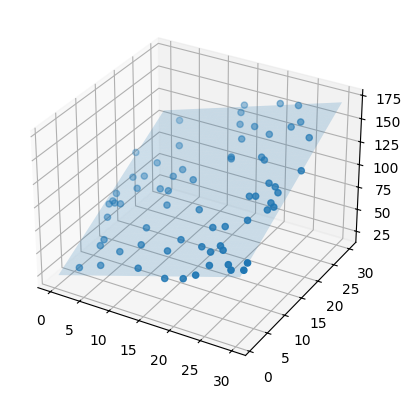

In [79]:
print(model.coef_,  model.intercept_)

x1 = X[:,0]
x2 = X[:,1]
y = Y

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y)

x1_ = np.linspace(min(x1), max(x1), 100)
x2_ = np.linspace(min(x2), max(x2), 100)

X1,X2 = np.meshgrid(x1_, x2_)

Y_ = model.intercept_ + model.coef_[0]*X1 + model.coef_[1]*X2

ax.plot_surface(X1, X2,Y_, alpha=0.2)